
Se importan las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

Se carga el archivo de datos (dataset)

In [2]:
load = files.upload()

Saving UNIV.xlsx to UNIV.xlsx


In [3]:
df = pd.read_excel('UNIV.xlsx')

In [4]:
df.head()

,PACA_COD,ALUM_RUT,ALUM_ACTIVO,ALUM_VIGENTE,EXISTE_EN_RETIRO,BAJA,MES_BAJA,ANIO_BAJA,VIGENCIA_ALUMNO,SEDE_DESC,...,N_NSP,IndNsp,N_ConexionesMiUDLA,OtrasCarrerasAbandonadasUDLA,IndicadorBECA,IndicadorCAE,N_Campanas,UltimaCampana,Rendimiento,Dedicacion
0,202310,169718970,NO,SI,NO,0,NaN,NaN,NO VIGENTE,VIÑA DEL MAR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202320,163479451,NO,SI,NO,0,NaN,NaN,NO VIGENTE,CONCEPCION,...,NaN,0.0,5.0,NaN,0.0,0.0,NaN,NaN,Medio,Baja
2,202320,167734936,SI,SI,NO,0,NaN,NaN,VIGENTE,CAMPUS VIRTUAL NACIONAL,...,NaN,0.0,1.0,NaN,0.0,0.0,NaN,NaN,Alto,Baja
3,202320,156492043,NO,NO,SI,1,6.0,2023.0,NO VIGENTE,ONLINE,...,NaN,0.0,NaN,0.0,0.0,0.0,2.0,"Hace 1 mes, 14 días",Medio,Baja
4,202320,13531207K,SI,SI,NO,0,NaN,NaN,VIGENTE,ONLINE,...,NaN,0.0,144.0,0.0,0.0,0.0,2.0,"Hace 11 meses, 18 días",Alto,Alta


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27164 entries, 0 to 27163
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PACA_COD                      27164 non-null  int64  
 1   ALUM_RUT                      27164 non-null  object 
 2   ALUM_ACTIVO                   27116 non-null  object 
 3   ALUM_VIGENTE                  27116 non-null  object 
 4   EXISTE_EN_RETIRO              27164 non-null  object 
 5   BAJA                          27164 non-null  int64  
 6   MES_BAJA                      2315 non-null   float64
 7   ANIO_BAJA                     2315 non-null   float64
 8   VIGENCIA_ALUMNO               27164 non-null  object 
 9   SEDE_DESC                     27116 non-null  object 
 10  REGI_DESC                     27116 non-null  object 
 11  FACU_DESC                     27116 non-null  object 
 12  CARR_COD                      27116 non-null  float64
 13  C

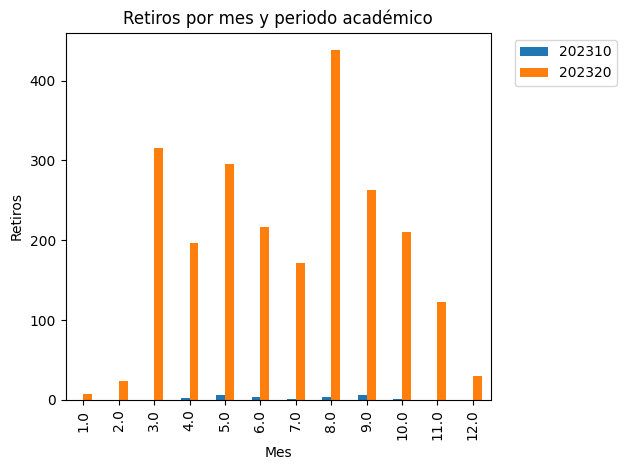

In [6]:
df_desercion = df[df['BAJA'] == 1]

count_mes = df_desercion.groupby(['PACA_COD','MES_BAJA'])['MES_BAJA'].count().reset_index(name='Retiros')
fig, ax = plt.subplots()
count_mes.pivot(index='MES_BAJA', columns='PACA_COD', values='Retiros').plot(kind='bar', ax=ax)
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")

ax.set_xlabel('Mes')
ax.set_ylabel('Retiros')
ax.set_title('Retiros por mes y periodo académico')

plt.tight_layout()
plt.show()

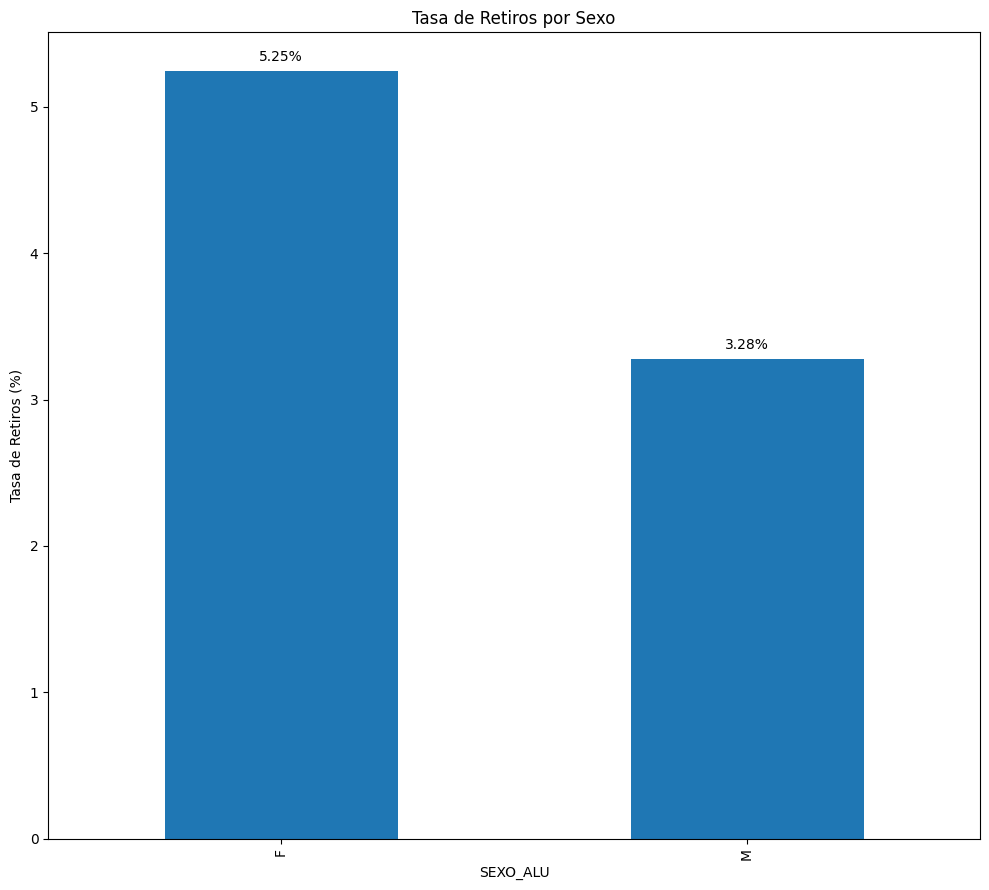

In [7]:
df_retiro = df[df['BAJA'] == 1]
regimen = df.groupby('SEXO_ALU')['BAJA'].count()
total_estudiantes = df.groupby('SEXO_ALU')['BAJA'].count().sum()

tasa_retiro = (df_retiro.groupby('SEXO_ALU')['BAJA'].count() / total_estudiantes).fillna(0) * 100

fig, ax = plt.subplots(figsize=(10, 9))
bar_plot = tasa_retiro.plot(kind='bar', ax=ax)

ax.set_ylabel('Tasa de Retiros (%)')
ax.set_title('Tasa de Retiros por Sexo')

for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


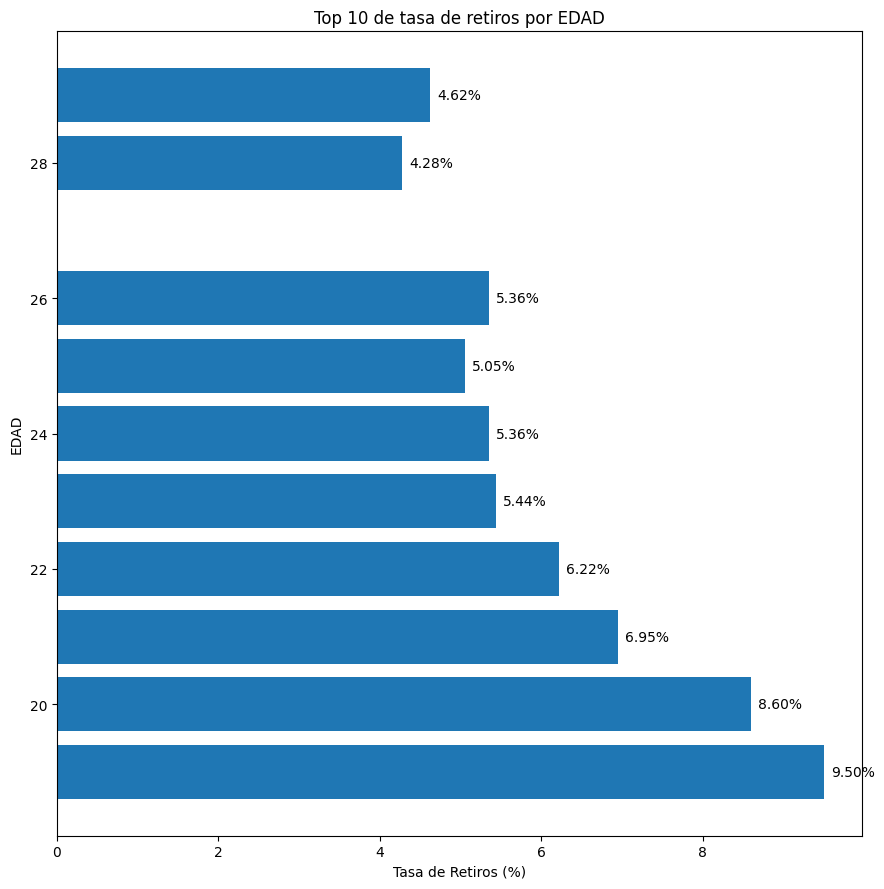

In [8]:
df_retiro = df[df['BAJA'] == 1]

df_EDAD = df_retiro.groupby('EDAD')['BAJA'].count().reset_index(name='retiros')

df_top10_EDAD = df_EDAD.sort_values('retiros', ascending=False).head(10)

total_retiros_EDAD = df_EDAD['retiros'].sum()
tasa_retiro_EDAD = (df_top10_EDAD['retiros'] / total_retiros_EDAD) * 100

fig, ax = plt.subplots(figsize=(9, 9))
bar_plot_EDAD = ax.barh(df_top10_EDAD['EDAD'], tasa_retiro_EDAD)

ax.set_title('Top 10 de tasa de retiros por EDAD')
ax.set_xlabel('Tasa de Retiros (%)')
ax.set_ylabel('EDAD')

for p in bar_plot_EDAD:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

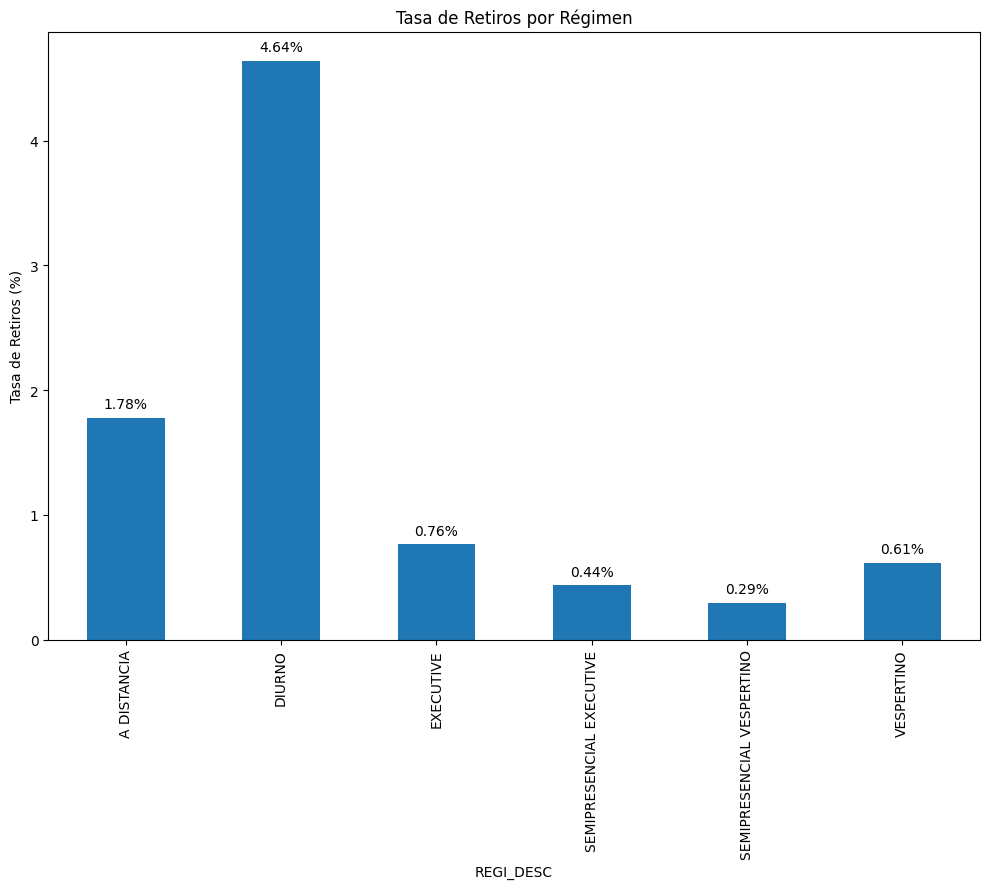

In [9]:
df_retiro = df[df['BAJA'] == 1]
regimen = df.groupby('REGI_DESC')['BAJA'].count()
total_estudiantes = df.groupby('REGI_DESC')['BAJA'].count().sum()

tasa_retiro = (df_retiro.groupby('REGI_DESC')['BAJA'].count() / total_estudiantes).fillna(0) * 100

fig, ax = plt.subplots(figsize=(10, 9))
bar_plot = tasa_retiro.plot(kind='bar', ax=ax)

ax.set_ylabel('Tasa de Retiros (%)')
ax.set_title('Tasa de Retiros por Régimen')

for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


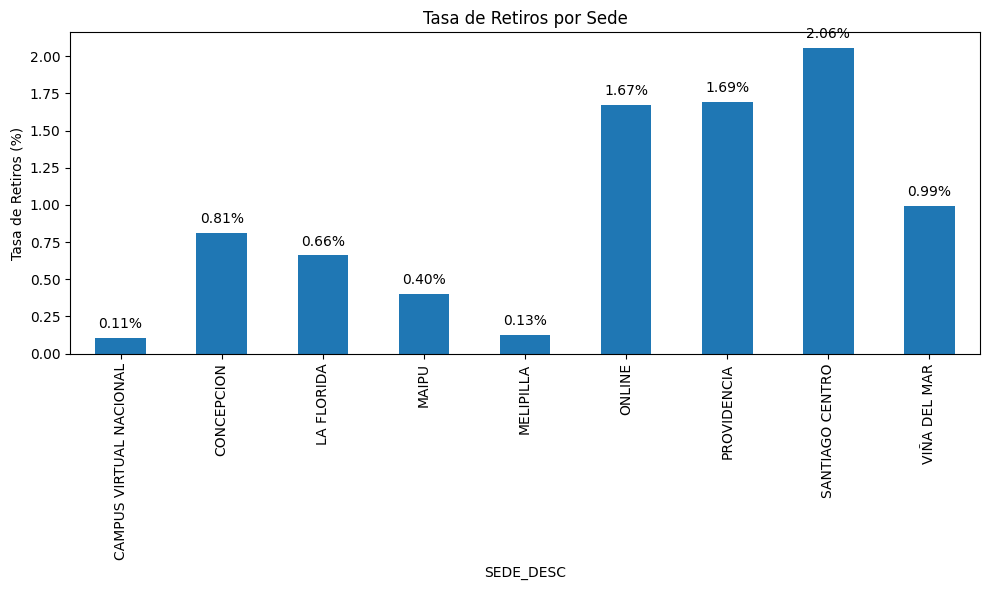

In [10]:
df_retiro = df[df['BAJA'] == 1]
sede = df.groupby('SEDE_DESC')['BAJA'].count()
total_estudiantes = df.groupby('SEDE_DESC')['BAJA'].count().sum()

tasa_retiro_sede = (df_retiro.groupby('SEDE_DESC')['BAJA'].count() / total_estudiantes).fillna(0) * 100

fig, ax = plt.subplots(figsize=(10, 6))
bar_plot_sede = tasa_retiro_sede.plot(kind='bar', ax=ax)

ax.set_ylabel('Tasa de Retiros (%)')
ax.set_title('Tasa de Retiros por Sede')

for p in bar_plot_sede.patches:
    bar_plot_sede.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


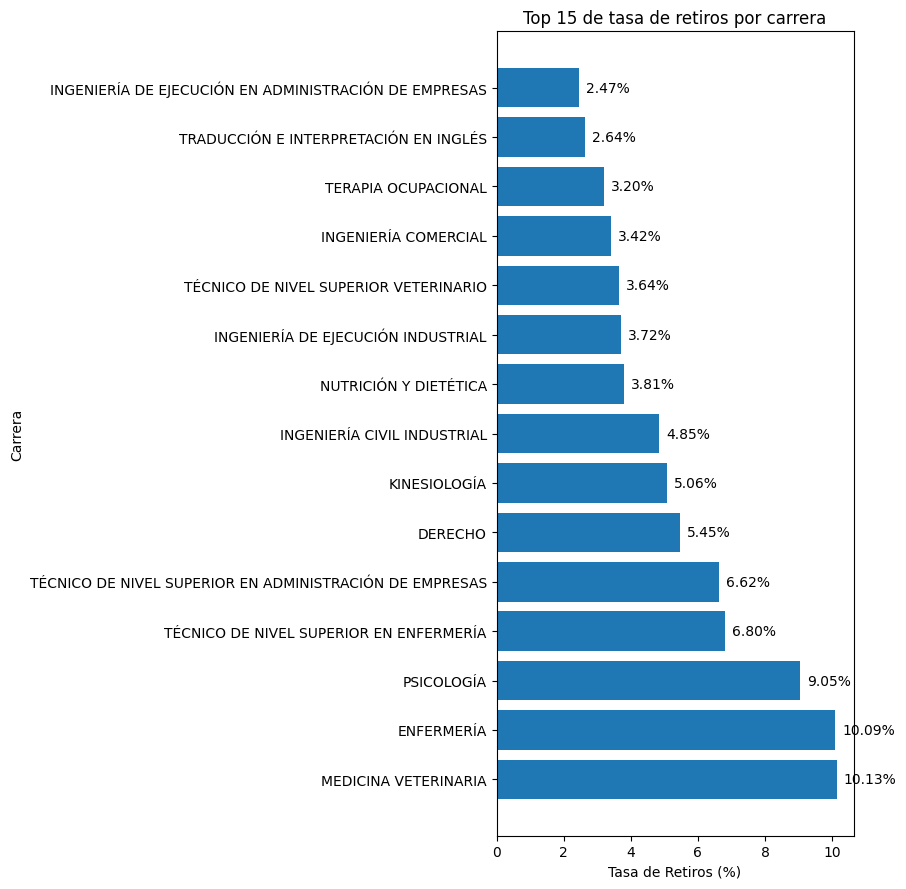

In [11]:
df_retiro = df[df['BAJA'] == 1]

df_carreras = df_retiro.groupby('CARR_DESC')['BAJA'].count().reset_index(name='retiros')

df_top15_carreras = df_carreras.sort_values('retiros', ascending=False).head(15)

total_retiros_carreras = df_carreras['retiros'].sum()
tasa_retiro_carreras = (df_top15_carreras['retiros'] / total_retiros_carreras) * 100

fig, ax = plt.subplots(figsize=(9, 9))
bar_plot_carreras = ax.barh(df_top15_carreras['CARR_DESC'], tasa_retiro_carreras)

ax.set_title('Top 15 de tasa de retiros por carrera')
ax.set_xlabel('Tasa de Retiros (%)')
ax.set_ylabel('Carrera')

for p in bar_plot_carreras:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()



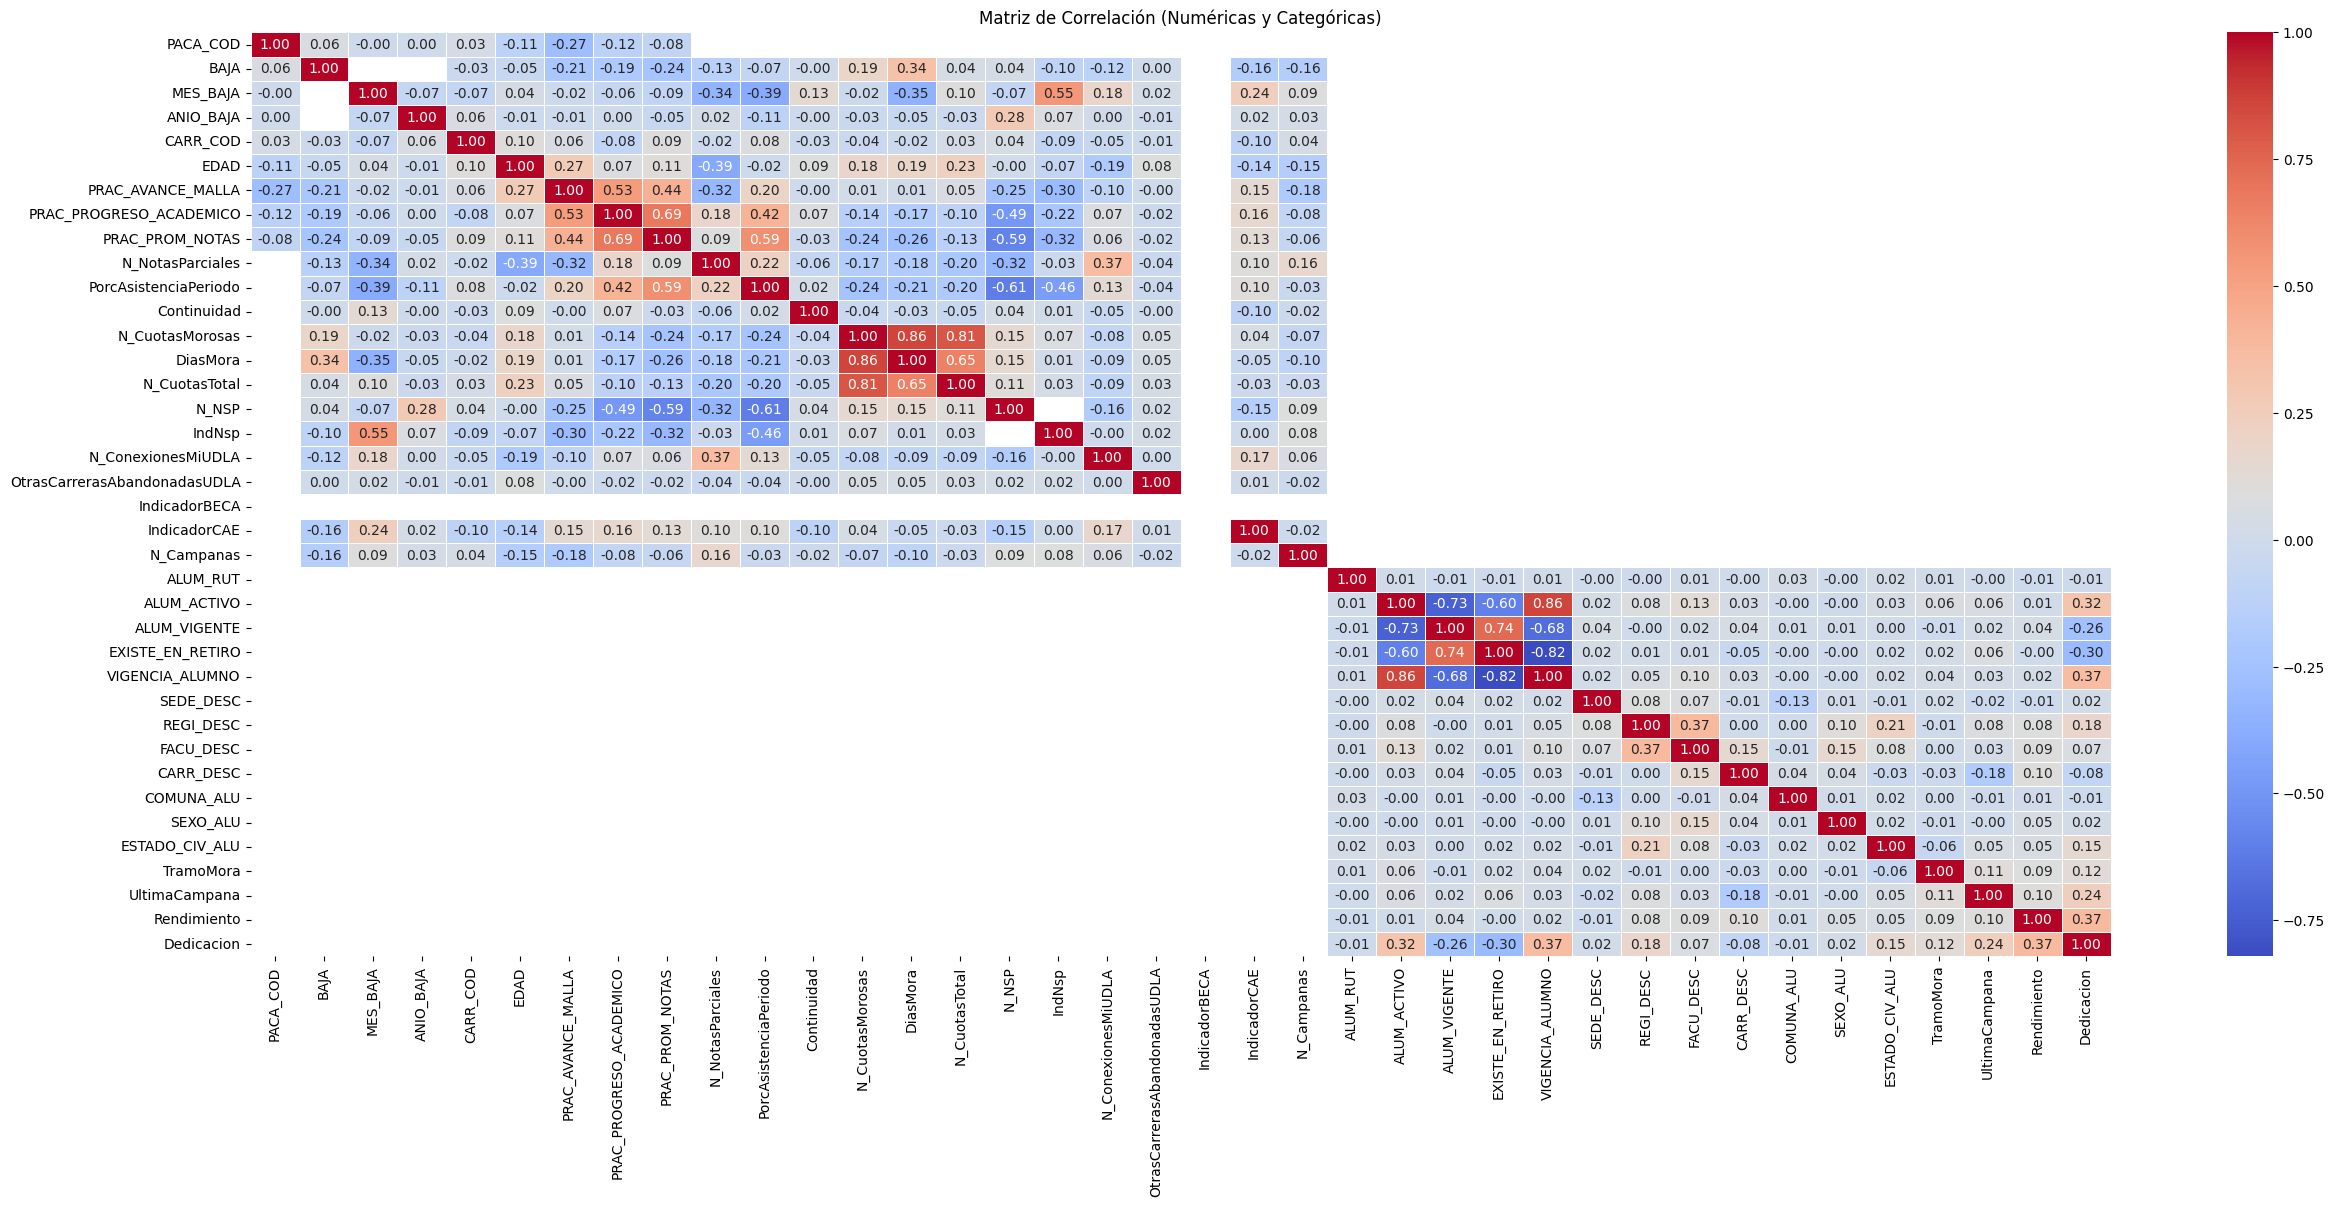

In [12]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_categorical = df.select_dtypes(include=['object'])

correlation_matrix_numeric = df_numeric.corr()

correlation_matrix_categorical = df_categorical.apply(lambda x: x.factorize()[0]).corr()

correlation_matrix_combined = pd.concat([correlation_matrix_numeric, correlation_matrix_categorical], axis=1)

plt.figure(figsize=(30, 12))
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación (Numéricas y Categóricas)')
plt.show()


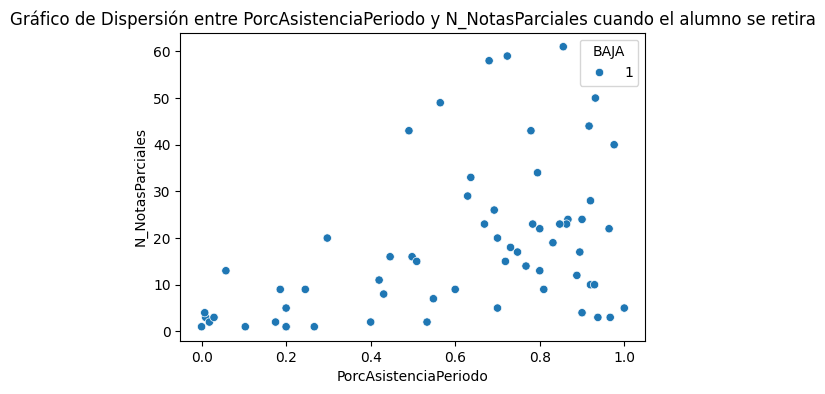

In [13]:
subset_df = df[df['BAJA'] == 1]
plt.figure(figsize=(6, 4))
sns.scatterplot(x='PorcAsistenciaPeriodo', y='N_NotasParciales', hue='BAJA', data=subset_df)
plt.title('Gráfico de Dispersión entre PorcAsistenciaPeriodo y N_NotasParciales cuando el alumno se retira')
plt.show()

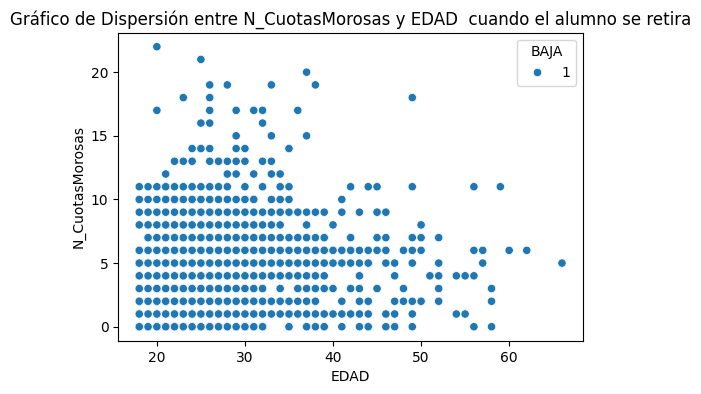

In [14]:
subset_df = df[df['BAJA'] == 1]
plt.figure(figsize=(6, 4))
sns.scatterplot(x='EDAD', y='N_CuotasMorosas', hue='BAJA', data=subset_df)
plt.title('Gráfico de Dispersión entre N_CuotasMorosas y EDAD  cuando el alumno se retira')
plt.show()

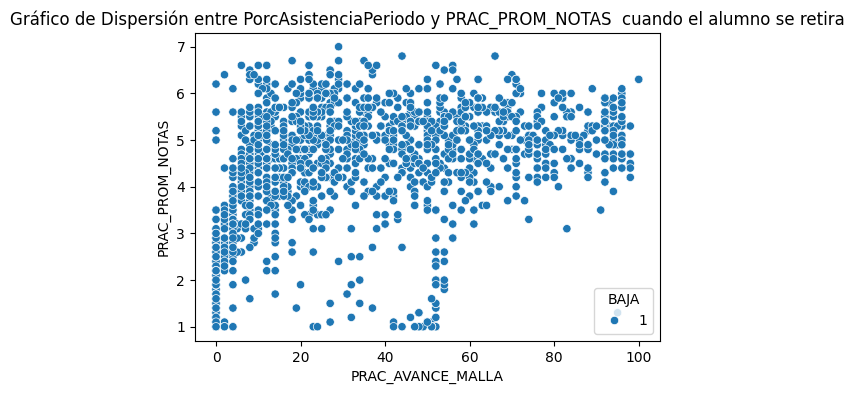

In [15]:
subset_df = df[df['BAJA'] == 1]
plt.figure(figsize=(6, 4))
sns.scatterplot(x='PRAC_AVANCE_MALLA', y='PRAC_PROM_NOTAS', hue='BAJA', data=subset_df)
plt.title('Gráfico de Dispersión entre PorcAsistenciaPeriodo y PRAC_PROM_NOTAS  cuando el alumno se retira')
plt.show()

<ipython-input-16-c03e0d0bca6d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  color.fillna('Desconocido', inplace=True)


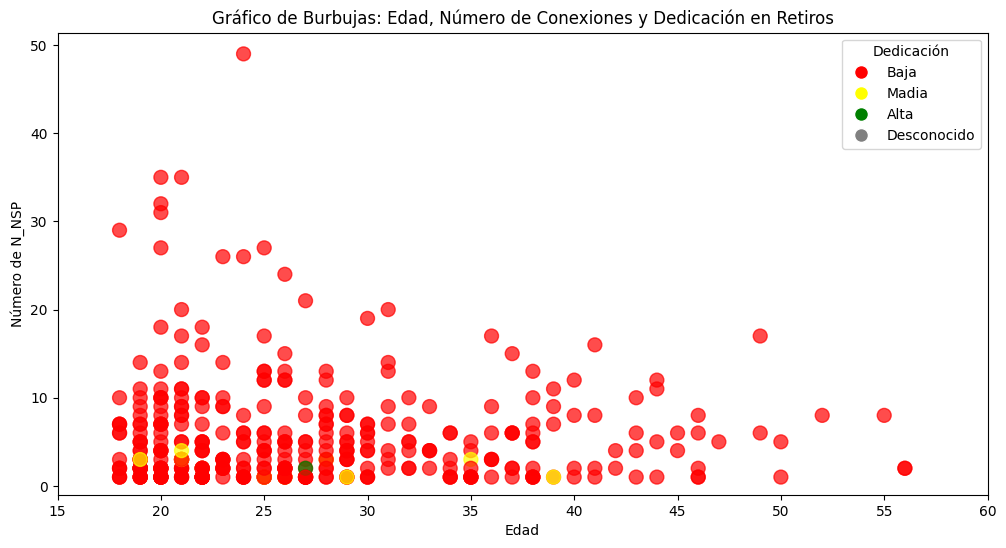

In [16]:
df_retiro = df[df['BAJA'] == 1]
x = df_retiro['EDAD']
y = df_retiro['N_NSP']
color = df_retiro['Dedicacion']

color.fillna('Desconocido', inplace=True)

dedicacion_colors = {'Baja': 'red', 'Madia': 'yellow', 'Alta': 'green', 'Desconocido': 'gray'}

color_mapped = color.map(dedicacion_colors)

plt.figure(figsize=(12, 6))
bubble_plot = plt.scatter(x, y, c=color_mapped, alpha=0.7, s=100)

plt.xlabel('Edad')
plt.ylabel('Número de N_NSP')
plt.title('Gráfico de Burbujas: Edad, Número de Conexiones y Dedicación en Retiros')
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=dedicacion_colors[label], markersize=10, label=label) for label in dedicacion_colors]
plt.legend(handles=legend_labels, title='Dedicación')
plt.xlim(15, 60)
plt.ylim(-1,)
plt.show()



<ipython-input-17-e9a17a3c753b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  color.fillna('Desconocido', inplace=True)


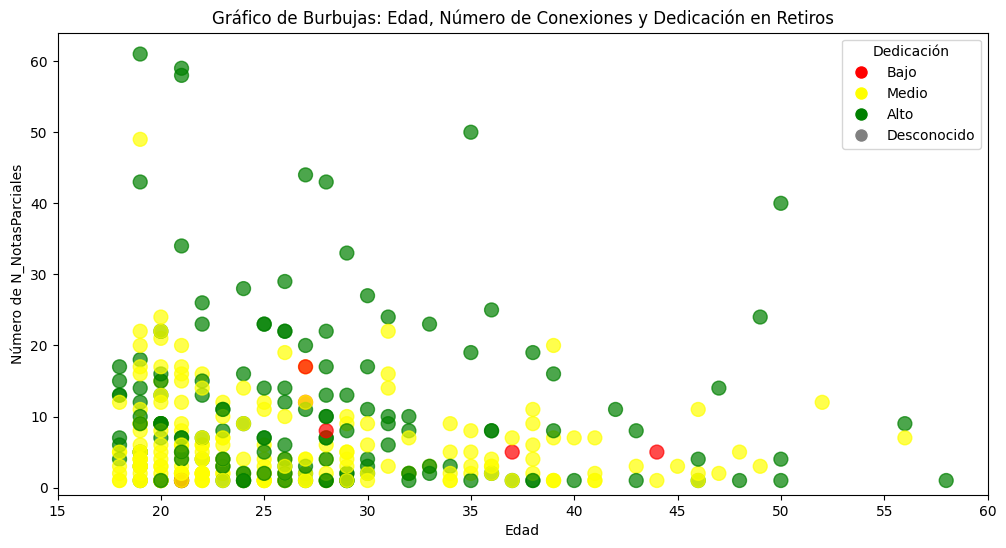

In [17]:
df_retiro = df[df['BAJA'] == 1]
x = df_retiro['EDAD']
y = df_retiro['N_NotasParciales']
color = df_retiro['Rendimiento']

color.fillna('Desconocido', inplace=True)

dedicacion_colors = {'Bajo': 'red', 'Medio': 'yellow', 'Alto': 'green', 'Desconocido': 'gray'}

color_mapped = color.map(dedicacion_colors)

plt.figure(figsize=(12, 6))
bubble_plot = plt.scatter(x, y, c=color_mapped, alpha=0.7, s=100)

plt.xlabel('Edad')
plt.ylabel('Número de N_NotasParciales')
plt.title('Gráfico de Burbujas: Edad, Número de Conexiones y Dedicación en Retiros')
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=dedicacion_colors[label], markersize=10, label=label) for label in dedicacion_colors]
plt.legend(handles=legend_labels, title='Dedicación')
plt.xlim(15, 60)
plt.ylim(-1,)
plt.show()

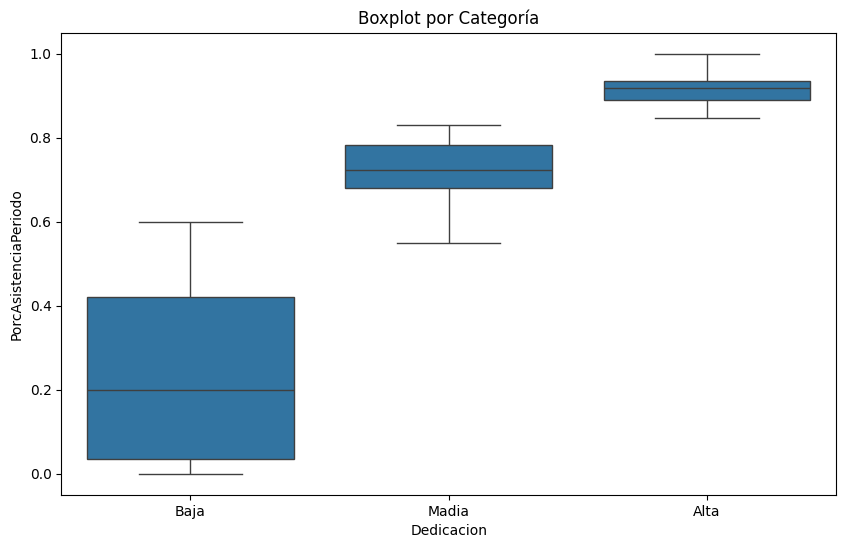

In [18]:
subset_df = df[df['BAJA'] == 1]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dedicacion', y='PorcAsistenciaPeriodo', data=subset_df)
plt.title('Boxplot por Categoría')
plt.show()

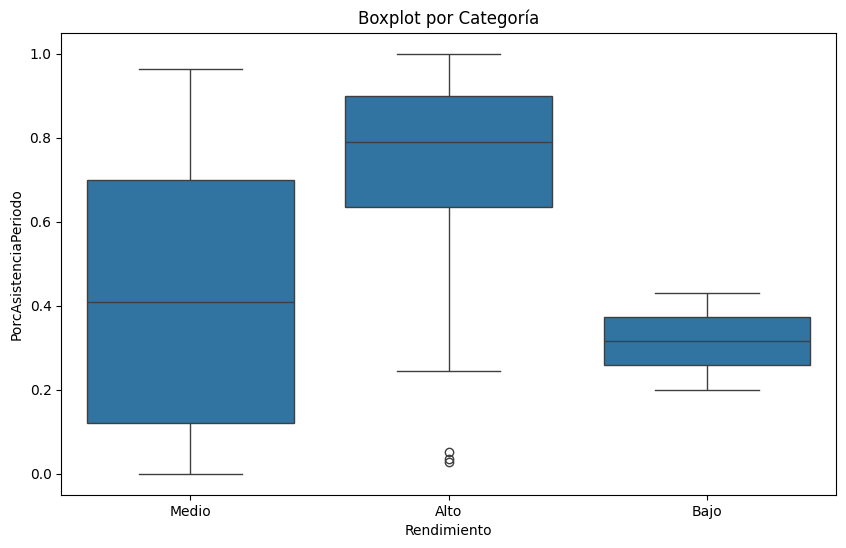

In [19]:
subset_df = df[df['BAJA'] == 1]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rendimiento', y='PorcAsistenciaPeriodo', data=subset_df)
plt.title('Boxplot por Categoría')
plt.show()

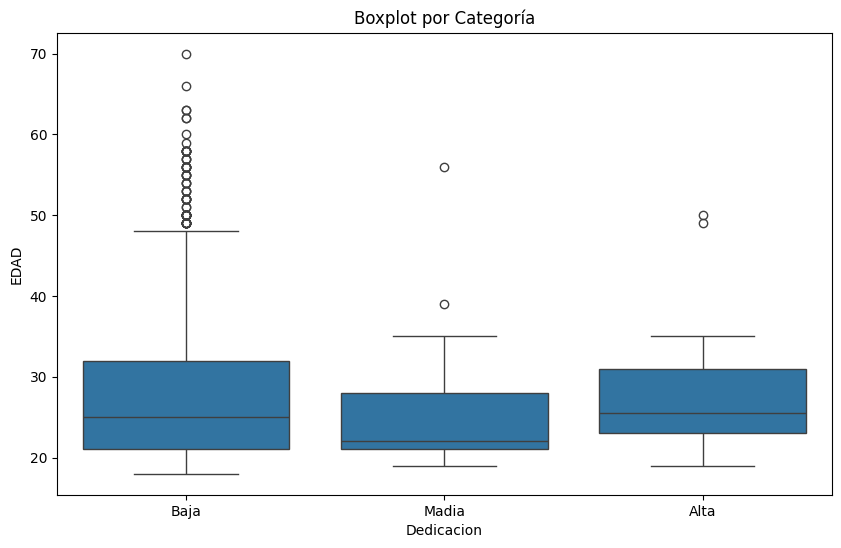

In [20]:
subset_df = df[df['BAJA'] == 1]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dedicacion', y='EDAD', data=subset_df)
plt.title('Boxplot por Categoría')
plt.show()


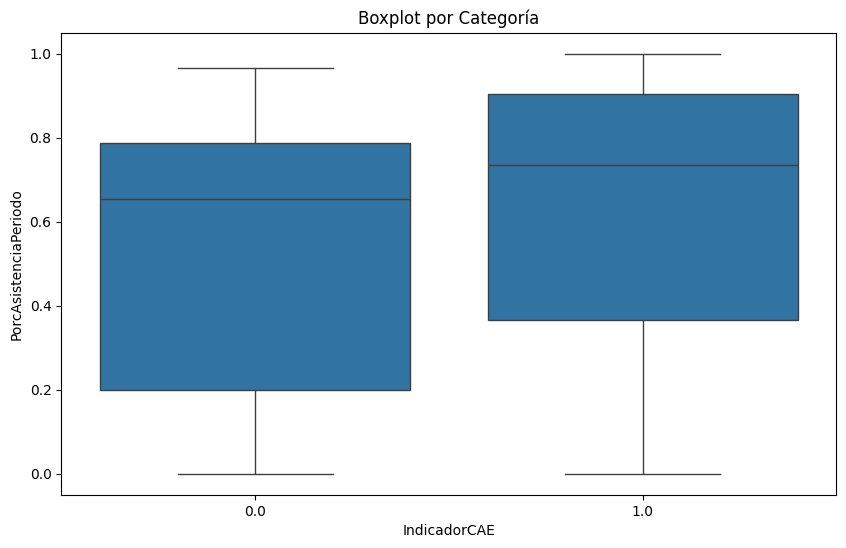

In [21]:
subset_df = df[df['BAJA'] == 1]
plt.figure(figsize=(10, 6))
sns.boxplot(x='IndicadorCAE', y='PorcAsistenciaPeriodo', data=subset_df)
plt.title('Boxplot por Categoría')
plt.show()


In [22]:
df.columns

Index(['PACA_COD', 'ALUM_RUT', 'ALUM_ACTIVO', 'ALUM_VIGENTE',
       'EXISTE_EN_RETIRO', 'BAJA', 'MES_BAJA', 'ANIO_BAJA', 'VIGENCIA_ALUMNO',
       'SEDE_DESC', 'REGI_DESC', 'FACU_DESC', 'CARR_COD', 'CARR_DESC',
       'COMUNA_ALU', 'SEXO_ALU', 'ESTADO_CIV_ALU', 'EDAD', 'PRAC_AVANCE_MALLA',
       'PRAC_PROGRESO_ACADEMICO', 'PRAC_PROM_NOTAS', 'N_NotasParciales',
       'PorcAsistenciaPeriodo', 'Continuidad', 'N_CuotasMorosas', 'DiasMora',
       'TramoMora', 'N_CuotasTotal', 'N_NSP', 'IndNsp', 'N_ConexionesMiUDLA',
       'OtrasCarrerasAbandonadasUDLA', 'IndicadorBECA', 'IndicadorCAE',
       'N_Campanas', 'UltimaCampana', 'Rendimiento', 'Dedicacion'],
      dtype='object')

In [23]:
import pandas as pd

cols_categoricas = ['ALUM_RUT', 'ALUM_ACTIVO', 'ALUM_VIGENTE', 'EXISTE_EN_RETIRO',
                    'VIGENCIA_ALUMNO', 'SEDE_DESC', 'REGI_DESC', 'FACU_DESC',
                    'CARR_DESC', 'COMUNA_ALU', 'SEXO_ALU', 'ESTADO_CIV_ALU','TramoMora', 'UltimaCampana', 'Rendimiento',
                    'Dedicacion']


for col in cols_categoricas:


  df[col] = df[col].astype('category')

  df[col] = df[col].cat.codes

df[cols_categoricas].dtypes

ALUM_RUT            int16
ALUM_ACTIVO          int8
ALUM_VIGENTE         int8
EXISTE_EN_RETIRO     int8
VIGENCIA_ALUMNO      int8
SEDE_DESC            int8
REGI_DESC            int8
FACU_DESC            int8
CARR_DESC           int16
COMUNA_ALU          int16
SEXO_ALU             int8
ESTADO_CIV_ALU       int8
TramoMora            int8
UltimaCampana       int16
Rendimiento          int8
Dedicacion           int8
dtype: object

In [24]:
df.columns

Index(['PACA_COD', 'ALUM_RUT', 'ALUM_ACTIVO', 'ALUM_VIGENTE',
       'EXISTE_EN_RETIRO', 'BAJA', 'MES_BAJA', 'ANIO_BAJA', 'VIGENCIA_ALUMNO',
       'SEDE_DESC', 'REGI_DESC', 'FACU_DESC', 'CARR_COD', 'CARR_DESC',
       'COMUNA_ALU', 'SEXO_ALU', 'ESTADO_CIV_ALU', 'EDAD', 'PRAC_AVANCE_MALLA',
       'PRAC_PROGRESO_ACADEMICO', 'PRAC_PROM_NOTAS', 'N_NotasParciales',
       'PorcAsistenciaPeriodo', 'Continuidad', 'N_CuotasMorosas', 'DiasMora',
       'TramoMora', 'N_CuotasTotal', 'N_NSP', 'IndNsp', 'N_ConexionesMiUDLA',
       'OtrasCarrerasAbandonadasUDLA', 'IndicadorBECA', 'IndicadorCAE',
       'N_Campanas', 'UltimaCampana', 'Rendimiento', 'Dedicacion'],
      dtype='object')

In [25]:
df = df.fillna(df.mean())

KNN

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop('BAJA', axis=1)
y = df['BAJA']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

accuracy3 = accuracy_score(y_test3, y_pred3)
print(f'Precisión: {accuracy3}')


Precisión: 0.9191974967789435


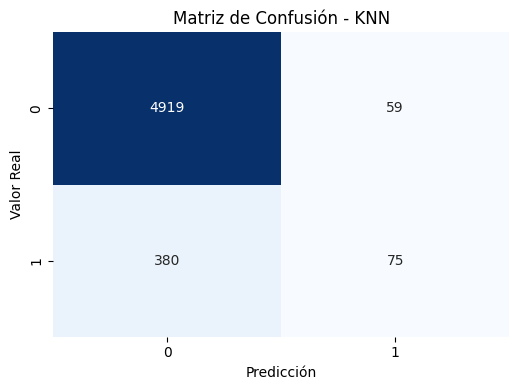

In [ ]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test3, y_pred3)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

grupos_variables = {
    'Academicas': ['ALUM_ACTIVO', 'ALUM_VIGENTE', 'EXISTE_EN_RETIRO', 'MES_BAJA', 'ANIO_BAJA', 'VIGENCIA_ALUMNO', 'SEDE_DESC', 'REGI_DESC', 'FACU_DESC', 'CARR_COD', 'CARR_DESC', 'PRAC_AVANCE_MALLA', 'PRAC_PROGRESO_ACADEMICO', 'PRAC_PROM_NOTAS', 'N_NotasParciales', 'PorcAsistenciaPeriodo', 'Continuidad', 'TramoMora', 'IndicadorCAE', 'IndicadorBECA', 'N_ConexionesMiUDLA', 'N_Campanas', 'UltimaCampana', 'Rendimiento', 'Dedicacion'],
    'Financieras': ['N_CuotasTotal', 'N_CuotasMorosas', 'DiasMora'],
    'Actitudinal': ['ALUM_RUT', 'COMUNA_ALU', 'SEXO_ALU', 'ESTADO_CIV_ALU', 'EDAD']
}

y = df['BAJA']

resultados = {}

for grupo, variables in grupos_variables.items():
    X = df[variables]
    X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.2, random_state=42)

    model5 = KNeighborsClassifier()
    model5.fit(X_train5, y_train5)
    y_pred5 = model5.predict(X_test5)

    precision = accuracy_score(y_test5, y_pred5)
    resultados[grupo] = precision

for grupo, precision in resultados.items():
    print(f'Grupo: {grupo}, Precisión Promedio: {precision:.2%}')



Grupo: Academicas, Precisión Promedio: 95.66%
Grupo: Financieras, Precisión Promedio: 93.32%
Grupo: Actitudinal, Precisión Promedio: 91.13%


In [33]:
import joblib
joblib.dump(df, 'C:\\Users\\odiazs\\Desktop\\modelo.joblib')


['C:\\Users\\odiazs\\Desktop\\modelo.joblib']